# Region of Interest


The very first step of your project will be to define the area you want to work on. This area is called the **region of interest** (ROI).

We will define our area of interest using a bounding box. To find the coordinates of a bounding box, check: [bboxfinder](http://bboxfinder.com/)

<figure class="image">
  <img src="bboxfinder.png" width="500">
</figure>

We will build a new shapefile containing the Region of Interest (ROI) from a set of coordinates.

In [11]:
import os
import geopandas as gpd
from shapely.geometry import Polygon
import contextily as cx
from pathlib import Path
import matplotlib.pyplot as plt
from IPython.display import display

print('All libraries successfully imported!')
print(f'GeoPandas : {gpd.__version__}')

All libraries successfully imported!
GeoPandas : 0.12.2


**Set directory**

In [12]:
computer_path = '/export/miro/ndeffense/LBRAT2104/'
grp_nb        = '99'

# Directory for all work files
work_path = f'{computer_path}STUDENTS/GROUP_{grp_nb}/TP/'

# Directory where ROI shapefile is stored
roi_path = f'{work_path}ROI/'

# Create ROI path if not exists
Path(roi_path).mkdir(parents=True, exist_ok=True)

## Choose CRS of your ROI

Choose the same CRS as the Sentinel data.

Geographic CRS| Projected CRS
:---------:|:----------:
span the entire globe | localized to minimize visual distortion <br/> in a particular region
based on a spheroid | based on a plane <br/> *(the spheroid projected onto a 2D surface)*
angular units (degrees) | linear unites (meters)
lat / lon | X / Y
World Geodetic System 1984 <br/> (WGS 84) | Universal Transverse Mercator  <br/> (UTM)
EPSG:4326 | EPSG:32631 (in Belgium)


In bboxfinder, you can easily switch from one CRS to another. As Sentinel images projected onto a WGS84/UTM grid, it is easier to get the coordinates of your ROI directly in WGS84/UTM.

It is important to set the EPSG code matching with the EPSG code of your satellite images!

For instance, if your ROI is located in Belgium,
- the CRS is WGS84 / UTM zone 31N
- the EPSG code is 32631

In [13]:
crs_dst = 'EPSG:32631'

**Give a name for the ROI shapefile**

Tip : You can include the EPSG code in the filename!

In [14]:
roi_name = 'extent_roi'

roi_filename = f'{roi_name}_{crs_dst[5:]}.shp'

roi_file = f'{roi_path}{roi_filename}'

print(f'ROI shapefile will be stored in : {roi_file}')

ROI shapefile will be stored in : /export/miro/ndeffense/LBRAT2104/STUDENTS/GROUP_99/TP/ROI/extent_roi_32631.shp


## Find the coordinates of your ROI bounding box (bbox)

You can easily copy the coordinates of your bounding box via bboxfinder.

**!! Be carefull of the crs_src you chose !!**

<figure class="image">
  <img src="ROI_box.png" width="600">
  <figcaption>Extent order in QGIS - ulx, uly : lrx, lry</figcaption>
</figure>

In [15]:
crs_src = 'EPSG:32631'
bbox    = [627263.7,5590485.2,637115,5596175.1]

ulx = bbox[0]
uly = bbox[1]
lrx = bbox[2]
lry = bbox[3]

print(f'Upper Left X  : {ulx}')
print(f'Upper Left Y  : {uly}')
print(f'Lower Right X : {lrx}')
print(f'Lower Right Y : {lry}')

Upper Left X  : 627263.7
Upper Left Y  : 5590485.2
Lower Right X : 637115
Lower Right Y : 5596175.1


## Store your ROI into a GeoDataFrame

In [16]:
# Create a list with the longitude coordinates (x)
lon_point_list = [ulx, lrx, lrx, ulx, ulx]

# Create a list with the latitude coordinates (y)
lat_point_list = [uly, uly, lry, lry, uly]

# Create a polygon object from the two list (lon and lat)
polygon_geom = Polygon(zip(lon_point_list, lat_point_list))

# Create a GeoDataFrame with the polygon object
gdf = gpd.GeoDataFrame(index=[0], crs=crs_src, geometry=[polygon_geom])       

# Reproject the GeoDataFrame to the destination CRS (needed only if you set your coordinates in WGS 84)
gdf = gdf.to_crs(crs_dst)

display(gdf)

# Check CRS of your polygon
print(f'ROI CRS : {gdf.crs}')

,geometry
0,"POLYGON ((627263.700 5590485.200, 637115.000 5..."


ROI CRS : EPSG:32631


**Add a name** - *optional*

In [17]:
gdf['name'] = 'ROI_wallonia'

display(gdf)

,geometry,name
0,"POLYGON ((627263.700 5590485.200, 637115.000 5...",ROI_wallonia


## Plot your ROI

Is it a nice rectangular polygon?

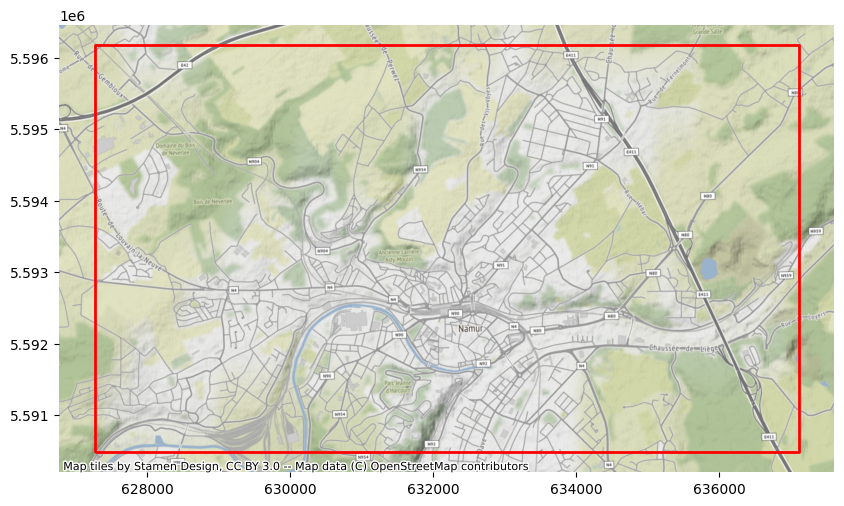

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))

gdf.boundary.plot(ax=ax,
                  color='red',
                  linewidth=2)

cx.add_basemap(ax, crs=gdf.crs.to_string())


plt.box(False)

**Write GeoDataFrame in a shapefile if not exists**

In [19]:
if not os.path.isfile(roi_file):
    gdf.to_file(filename=roi_file, driver='ESRI Shapefile')
    print(f'A new vector file is created : {roi_file}')

else:
    print('The ROI vector file already exists --> delete it or change the variable "roi_name" if you want to create a new one')

A new vector file is created : /export/miro/ndeffense/LBRAT2104/STUDENTS/GROUP_99/TP/ROI/extent_roi_32631.shp
